Project = Sales Analysis 

Project statement: 

AAL, established in 2000, is a well-known brand in Australia, particularly 
recognized for its clothing business. It has opened branches in various states, 
metropolises, and tier-1 and tier-2 cities across the country. 
The brand caters to all age groups, from kids to the elderly. 
Currently experiencing a surge in business, AAL is actively pursuing expansion 
opportunities. To facilitate informed investment decisions, the CEO has assigned 
the responsibility to the head of AAL’s sales and marketing (S&M) department. 
The specific tasks include: 
1) Identify the states that are generating the highest revenues. 
2) Develop sales programs for states with lower revenues. The head of sales 
and marketing has requested your assistance with this task. 
Analyze the sales data of the company for the fourth quarter in Australia, 
examining it on a state-by-state basis. Provide insights to assist the company in 
making data-driven decisions for the upcoming year. 
*Enclosed is the CSV (AusApparalSales4thQrt2020.csv) file that covers the said data.

Perform the following steps: 

As a data scientist, you must perform the following steps on the enclosed data: 
1. Data wrangling 
2. Data analysis 
3. Data visualization 
4. Report generation

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
# Loading the data
file_path = r"D:\IIT Kanpur AI ML\IITK AIML Core Applied Data Science with Python_project_statement\AusApparalSales4thQrt2020.csv"
df = pd.read_csv(file_path)
print (df)

             Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


1. Data wrangling

a. Ensure that the data is clean and free from any missing or incorrect 
entries. 
○ Inspect the data manually to identify missing or incorrect 
information using the functions isna() and notna().

In [3]:
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


b.Based on your knowledge of data analytics, include your 
recommendations for treating missing and incorrect data (dropping the 
null values or filling them). 

No missing values found, so no action needed


c. Choose a suitable data wrangling technique—either data standardization 
or normalization. Execute the preferred normalization method and 
present the resulting data. (Normalization is the preferred approach for this 
problem.) 

In [5]:
scaler = MinMaxScaler()
df[['Unit_normalized', 'Sales_normalized']] = scaler.fit_transform(df[['Unit', 'Sales']])
print (df)

             Date        Time State     Group  Unit  Sales  Unit_normalized  \
0      1-Oct-2020     Morning    WA      Kids     8  20000         0.095238   
1      1-Oct-2020     Morning    WA       Men     8  20000         0.095238   
2      1-Oct-2020     Morning    WA     Women     4  10000         0.031746   
3      1-Oct-2020     Morning    WA   Seniors    15  37500         0.206349   
4      1-Oct-2020   Afternoon    WA      Kids     3   7500         0.015873   
...           ...         ...   ...       ...   ...    ...              ...   
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000         0.190476   
7556  30-Dec-2020     Evening   TAS      Kids    15  37500         0.206349   
7557  30-Dec-2020     Evening   TAS       Men    15  37500         0.206349   
7558  30-Dec-2020     Evening   TAS     Women    11  27500         0.142857   
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500         0.174603   

      Sales_normalized  
0             0.095238  
1

d. Share your insights regarding the application of the GroupBy() function for 
either data chunking or merging, and offer a recommendation based on 
your analysis.

Recommendation:
Use groupby() for:
Time-based reports (e.g., weekly, monthly sales).
Demographic comparisons (e.g., Kids vs. Women).
Efficient aggregation before plotting or modeling.

In [10]:
group_sales_avg = df.groupby("Group")["Sales"].mean()
print("\nAverage Sales per Group:\n", group_sales_avg)


Average Sales per Group:
 Group
Kids       45011.904762
Men        45370.370370
Seniors    44464.285714
Women      45207.671958
Name: Sales, dtype: float64


2. Data analysis

In [ ]:
a. Perform descriptive statistical analysis on the data in the Sales and Unit 
columns. Utilize techniques such as mean, median, mode, and standard 
deviation for this analysis. 

In [7]:
for col in ['Sales', 'Unit']:
    print(f"\nDescriptive statistics for {col}:")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])
    print("Standard Deviation:", df[col].std())


Descriptive statistics for Sales:
Mean: 45013.5582010582
Median: 35000.0
Mode: 22500
Standard Deviation: 32253.506943966317

Descriptive statistics for Unit:
Mean: 18.00542328042328
Median: 14.0
Mode: 9
Standard Deviation: 12.901402777586458


b. Identify the group with the highest sales and the group with the lowest 
sales based on the data provided. 

In [12]:
total_sales_by_group = df.groupby("Group")["Sales"].sum()
print("\nGroup with highest sales:", total_sales_by_group.idxmax())
print("Group with lowest sales:", total_sales_by_group.idxmin())


Group with highest sales:  Men
Group with lowest sales:  Seniors


In [ ]:
c. Identify the group with the highest and lowest sales based on the data 
provided.

Already covered in b (repeated point)

d. Generate weekly, monthly, and quarterly reports to document and 
present the results of the analysis conducted. 
(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the 
analysis.) 

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Generate time-based reports
def summarize_by_period(period):
    return df.groupby(period)['Sales'].sum()

weekly_report = summarize_by_period('Week')
monthly_report = summarize_by_period('Month')
quarterly_report = summarize_by_period('Quarter')

print("\nWeekly Report:\n", weekly_report)
print("\nMonthly Report:\n", monthly_report)
print("\nQuarterly Report:\n", quarterly_report)


Weekly Report:
 Week
40    15045000
41    27002500
42    26640000
43    26815000
44    21807500
45    20865000
46    21172500
47    21112500
48    21477500
49    29622500
50    31525000
51    31655000
52    31770000
53    13792500
Name: Sales, dtype: int64

Monthly Report:
 Month
10    114290000
11     90682500
12    135330000
Name: Sales, dtype: int64

Quarterly Report:
 Quarter
4    340302500
Name: Sales, dtype: int64


In [ ]:
3. Data visualization 
a. Use suitable data visualization libraries to construct a dashboard for the 
head of sales and marketing. The dashboard should encompass key 
parameters: 
o State-wise sales analysis for different demographic groups (kids, 
women, men, and seniors). 
o Group-wise sales analysis (Kids, Women, Men, and Seniors) across 
various states. 
o Time-of-the-day analysis: Identify peak and off-peak sales periods 
to facilitate strategic planning for S&M teams. This information aids 
in designing programs like hyper-personalization and Next Best Offers 
to enhance sales. 
b. Ensure the visualization is clear and accessible for effective decision
making by the head of sales and marketing (S&M). 
The dashboard must contain daily, weekly, monthly, and quarterly charts. 
(Any visualization library can be used for this purpose. However, since 
statistical analysis is being done, Seaborn is preferred.) 
c. Include your recommendation and indicate why you are choosing the 
recommended visualization package.


4. Report generation  
a) Use JupyterLab Notebook for generating reports, which includes tasks 
such as data wrangling, analysis, and visualization. Please note that 
JupyterLab enables you to integrate code seamlessly with graphs and 
plots. 
b) Use Markdown in suitable places while presenting your report.  
c) Use suitable graphs, plots, and analysis reports in the report, along with 
recommendations. Note that various aspects of analysis require different 
graphs and plots. 
○ Use a box plot for descriptive statistics. 
○ Use the Seaborn distribution plot for any other statistical plotting.                                  

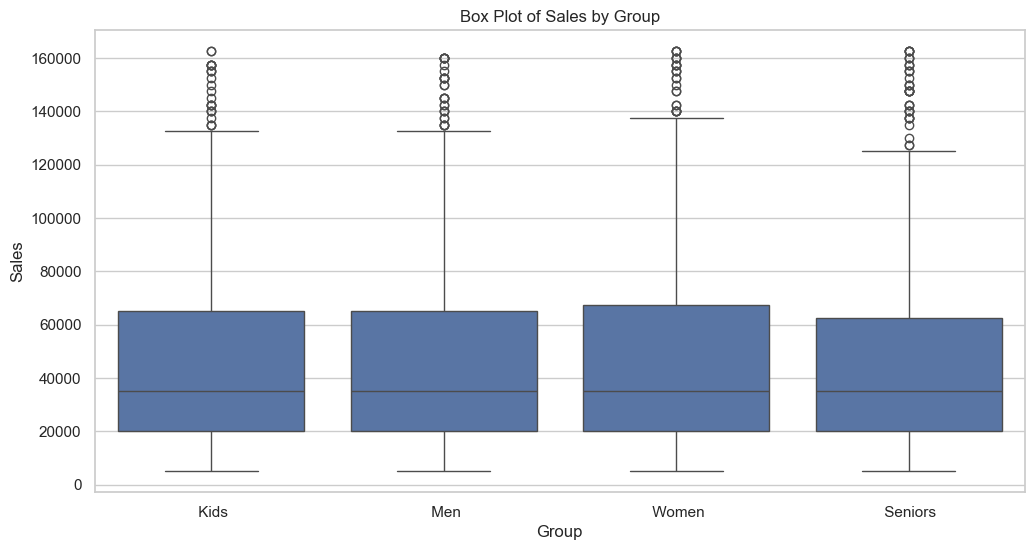

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Group", y="Sales", data=df)
plt.title("Box Plot of Sales by Group")
plt.show()

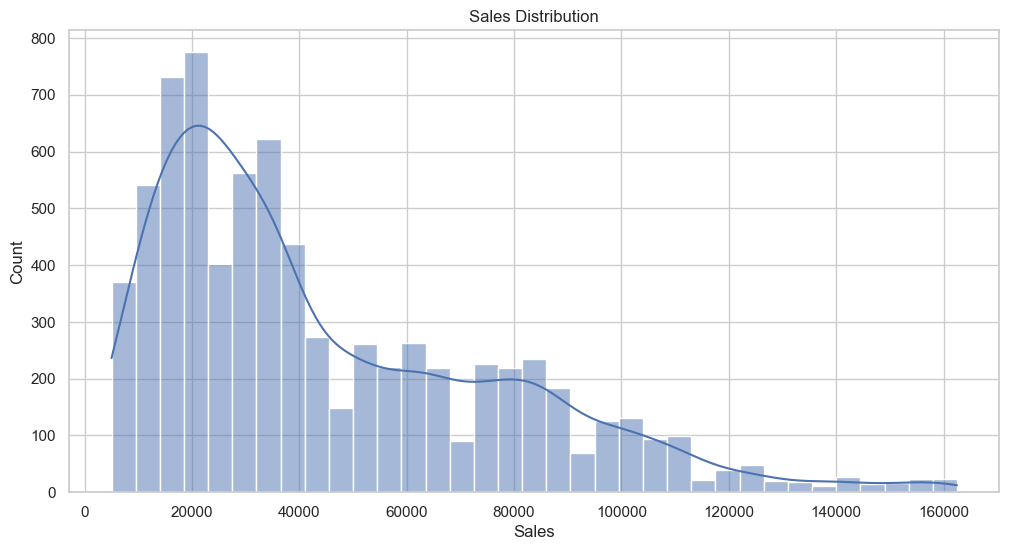

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

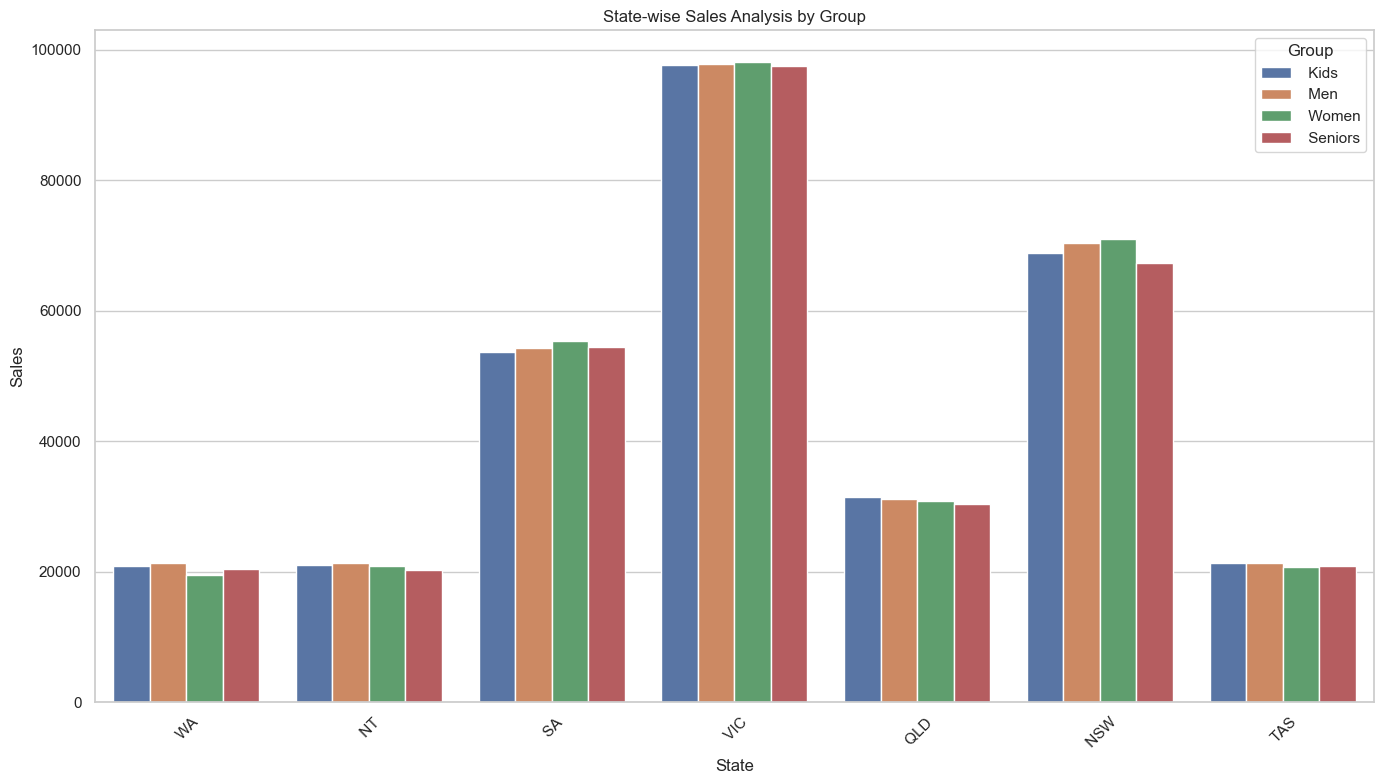

In [18]:
# State-wise sales analysis
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='State', y='Sales', hue='Group', errorbar=None)
plt.title("State-wise Sales Analysis by Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

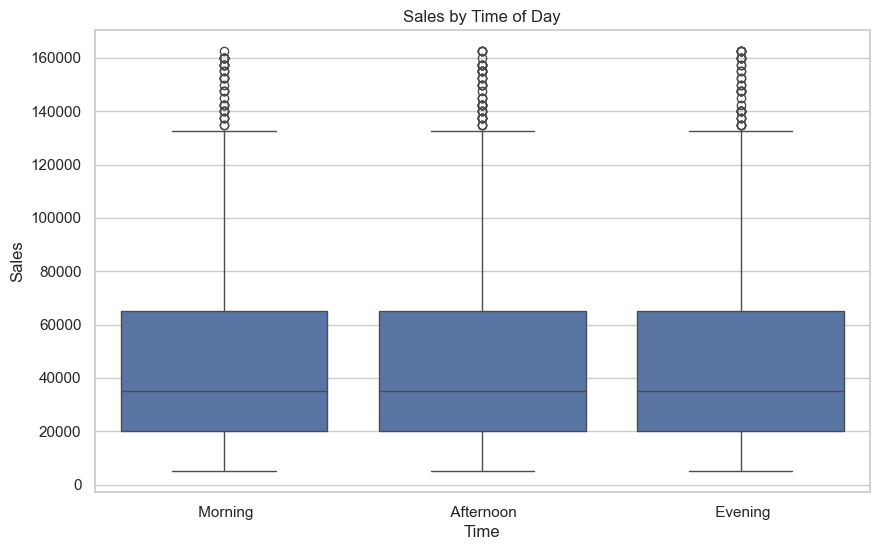

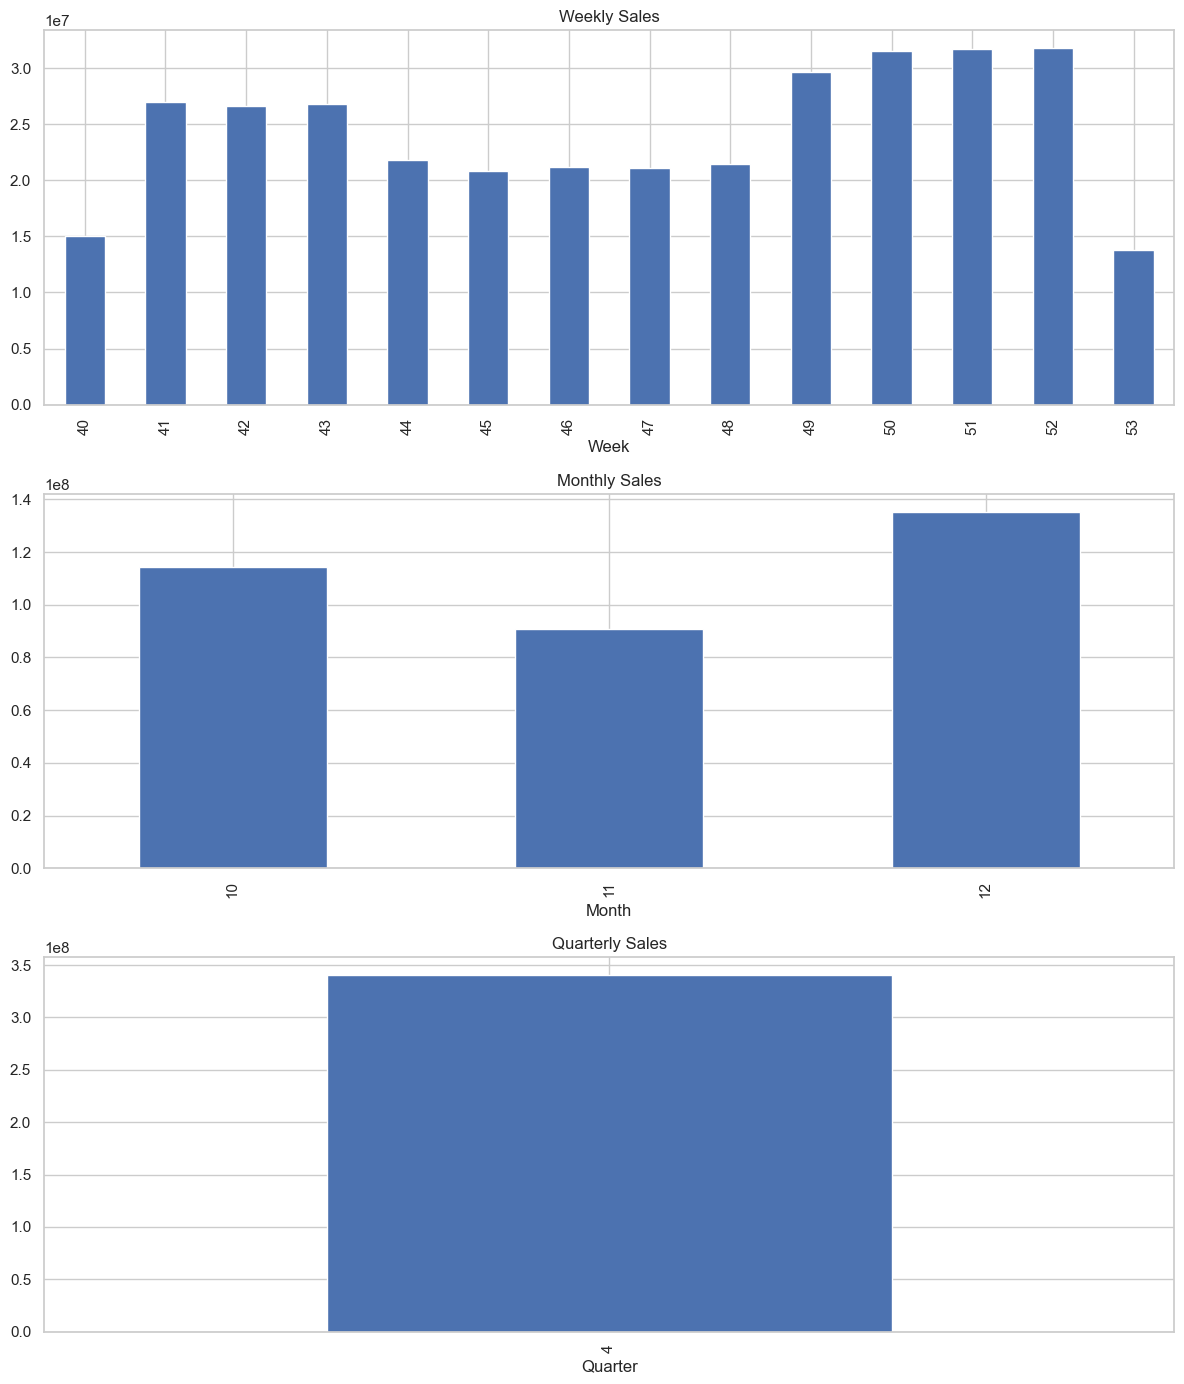

In [25]:
# Time of day sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Time', y='Sales')
plt.title("Sales by Time of Day")
plt.show()
# Time period charts
fig, axes = plt.subplots(3, 1, figsize=(12, 14))
weekly_report.plot(kind='bar', ax=axes[0], title='Weekly Sales')
monthly_report.plot(kind='bar', ax=axes[1], title='Monthly Sales')
quarterly_report.plot(kind='bar', ax=axes[2], title='Quarterly Sales')
plt.tight_layout()
plt.show()

We have chosen Seaborn as the primary visualization library because:
It offers advanced statistical visualizations with minimal code.
It integrates well with Pandas DataFrames, making data exploration easier.
It supports Box plots, Distribution plots, and Categorical analysis natively, aligning perfectly with our report requirements.
Seaborn makes it easy to add regression lines, error bars, and multi-facet plots for deeper analysis if needed in the future.
Thus, Seaborn was the logical choice to meet both statistical and business reporting standards.